# Salaries in data field

URL: https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs

Go to kaggle and download this dataset on job salaries in the data field. In this exercise it is many cases easier to solve the exercises if you combine duckdb with pandas for analysis.

  a) Start with some simple EDA, check summary statistics, info, columns etc

  b) Plot the distribution of the salaries in USD.

  c) How many job postings are there for each job title? Take the tenth most common job title and plot a bar chart of the number of job postings for that title.

  d) Create a dataframe that contains the following columns: job_title, experience_level, median_salary_usd, mean_salary_usd, mean_salary_sek. Sort the dataframe by mean_salary_sek.

  f) Create a column with salary in SEK per month and make the distribution of salaries in SEK per month for all job postings

  g) Now create distributions of monthly SEK based on different experience levels, do you see any trends?

  h) Find median monthly swedish salary for more common job_titles. Think what common may mean here.

  i) Join the country_codes.csv to the dataset get the actual country names. Find the median monthly salary in SEK for each country and the number of job postings.

## Column Descriptions:
#### work_year
The year the salary was reported. Covers salaries from 2020 through 2025.

#### experience_level
The seniority level of the employee at the time of reporting. Common values include:

EN: Entry-level / Junior
MI: Mid-level / Intermediate
SE: Senior-level
EX: Executive / Director

#### employment_type
The type of employment contract:

FT: Full-time
PT: Part-time
CT: Contract
FL: Freelance
#### job_title
The employee’s specific job title (e.g., Data Scientist, ML Engineer, AI Specialist, Research Scientist).

#### salary
The employee's gross annual salary in the original reported currency, before taxes and deductions.

#### salary_currency
The currency in which the salary was originally paid (e.g., USD, EUR, INR).

#### salary_in_usd
The employee's salary converted into USD using 2025 exchange rates for standardized comparison.

#### employee_residence
The country (ISO 3166-1 alpha-2 code) where the employee resides. This may differ from the company location, especially in remote roles.

#### remote_ratio
Indicates the percentage of remote work:

0: No remote work (On-site)
50: Hybrid (partially remote)
100: Fully remote
company_location
The country (ISO 3166-1 alpha-2 code) where the company or employer is headquartered.

#### company_size
The size of the employing organization:

S: Small (1–50 employees)
M: Medium (51–500 employees)
L: Large (501+ employees)

exercises below:

#### a) simple EDA

In [66]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../../data/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [68]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.628380e+05,157527.458411,20.938625
std,0.671842,2.080124e+05,74150.772377,40.620393
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105800.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [69]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

#### b) Plot the distribution of the salaries in USD

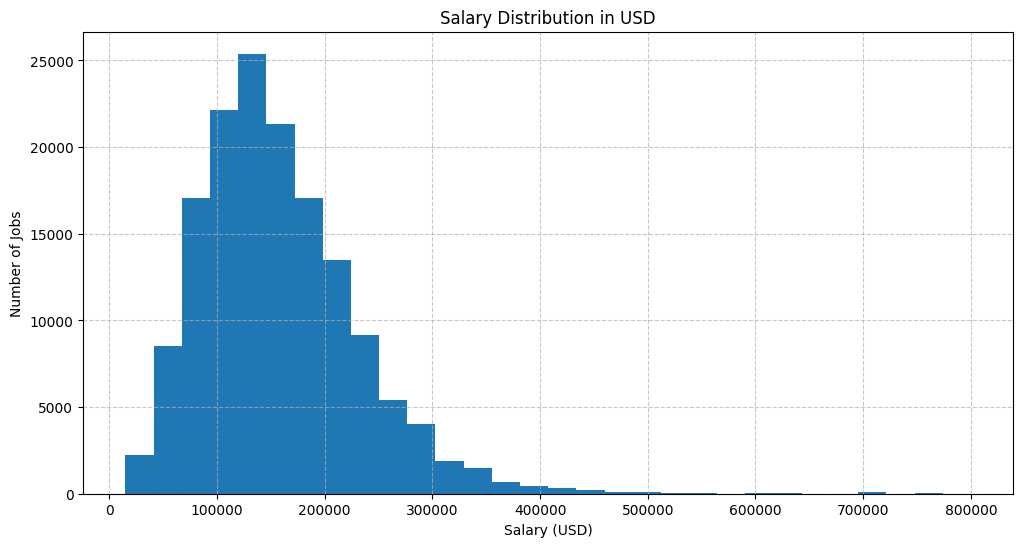

In [70]:
import matplotlib.pyplot as plt


# Create figure for plotting
plt.figure(figsize=(12, 6))
plt.hist(df["salary_in_usd"], bins=30)
plt.title("Salary Distribution in USD")
plt.xlabel("Salary (USD)")
plt.ylabel("Number of Jobs")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

#### c) How many job postings are there for each job title? Take the tenth most common job title and plot a bar chart of the number of job postings for that title

In [71]:
title_counts = df["job_title"].value_counts()
title_counts.head(10)

job_title
Data Scientist               18751
Software Engineer            16948
Data Engineer                16352
Data Analyst                 13779
Engineer                     11004
Machine Learning Engineer     8887
Manager                       7811
Analyst                       5396
Research Scientist            3460
Product Manager               2576
Name: count, dtype: int64

In [72]:
# index picks the 10th most common job title(0-based index)
# iloc picks the 10th most common count(number of job postings)
tenth_most_common_title = title_counts.index[9]
tenth_most_common_count = title_counts.iloc[9]

print(tenth_most_common_title)
print(f"{tenth_most_common_count} job postings related to {tenth_most_common_title}")



Product Manager
2576 job postings related to Product Manager


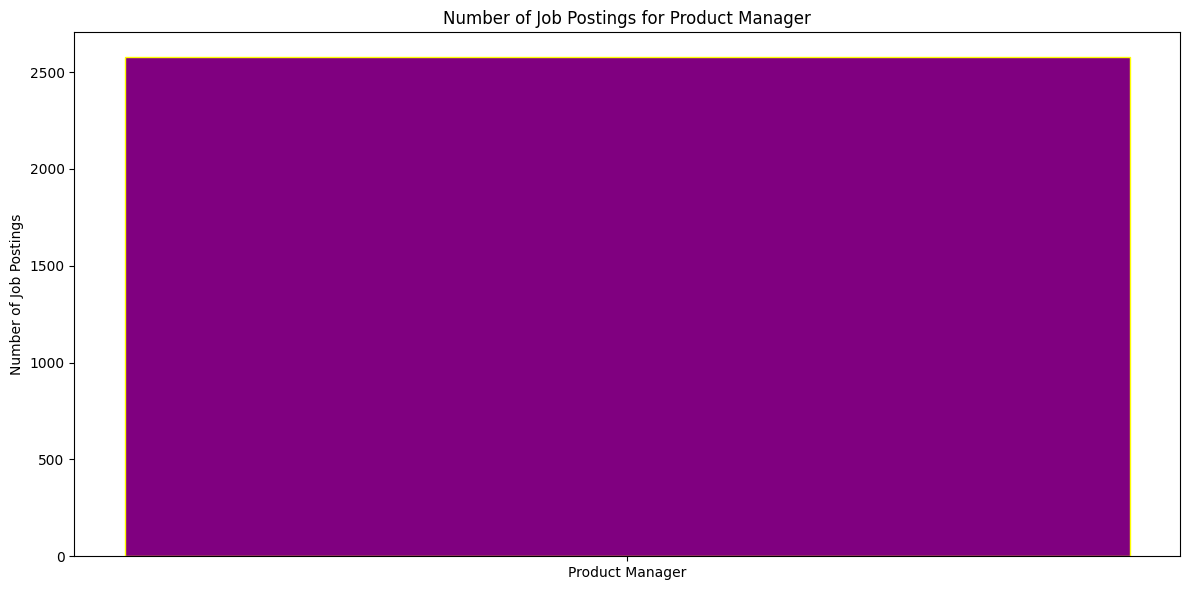

In [73]:
plt.figure(figsize=(12, 6))
plt.bar(tenth_most_common_title, tenth_most_common_count, color="purple",edgecolor="yellow")
plt.title(f"Number of Job Postings for {tenth_most_common_title}")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.show()

In [74]:
top_ten_titles = title_counts.head(10)
print(top_ten_titles)

job_title
Data Scientist               18751
Software Engineer            16948
Data Engineer                16352
Data Analyst                 13779
Engineer                     11004
Machine Learning Engineer     8887
Manager                       7811
Analyst                       5396
Research Scientist            3460
Product Manager               2576
Name: count, dtype: int64


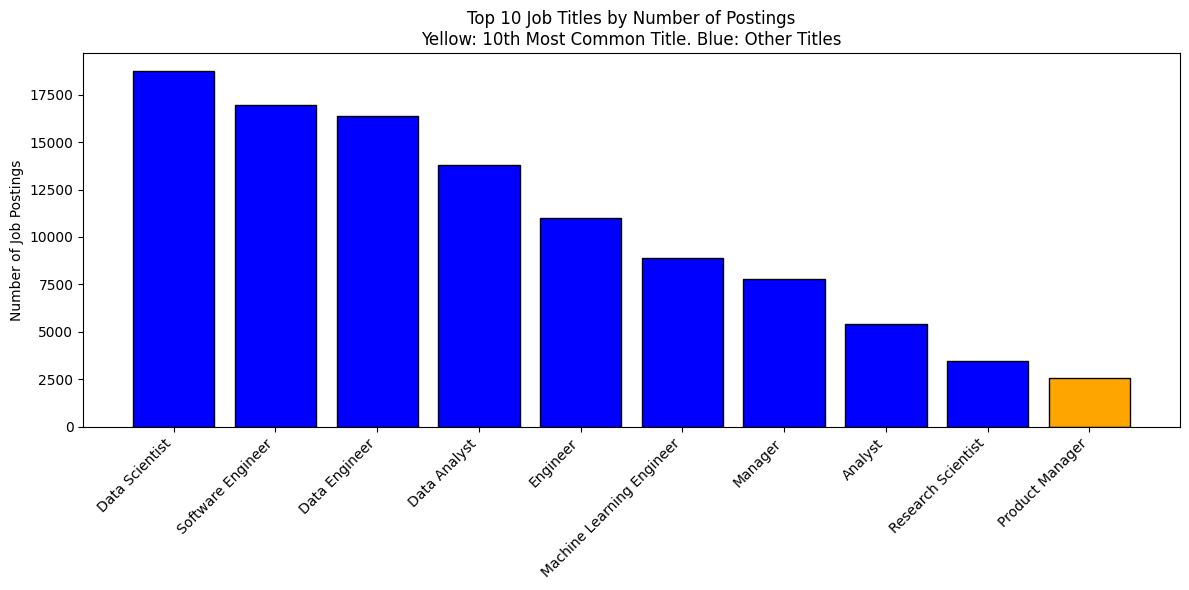

In [75]:
colors = [
    "orange" if title == tenth_most_common_title else "blue" for title in top_ten_titles.index
]

plt.figure(figsize=(12, 6))
plt.bar(top_ten_titles.index, top_ten_titles.values, color=colors, edgecolor="black")

plt.title("Top 10 Job Titles by Number of Postings\nYellow: 10th Most Common Title. Blue: Other Titles")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

d) Create a dataframe that contains the following columns: job_title, experience_level, median_salary_usd, mean_salary_usd, mean_salary_sek. Sort the dataframe by mean_salary_sek.

In [76]:
usd_to_sek = 10.5  # Example rate, adjust as needed

salary_stats = (
    df.groupby(["job_title", "experience_level"])["salary_in_usd"]
    .agg(median_salary_usd="median", mean_salary_usd="mean")
    .reset_index()
)

salary_stats["mean_salary_sek"] = salary_stats["mean_salary_usd"] * usd_to_sek

salary_stats = salary_stats.sort_values(by="mean_salary_sek", ascending=False)

salary_stats.head(100)

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek
1,AI Architect,MI,800000.0,800000.000000,8.400000e+06
815,Research Team Lead,SE,450000.0,450000.000000,4.725000e+06
728,Principal Data Scientist,EX,416000.0,416000.000000,4.368000e+06
92,Analytics Engineering Manager,SE,399880.0,399880.000000,4.198740e+06
463,Data Science Tech Lead,SE,375000.0,375000.000000,3.937500e+06
...,...,...,...,...,...
27,AI Product Lead,SE,177590.0,199057.857143,2.090107e+06
846,Site Reliability Engineer,SE,180745.0,198565.400602,2.084937e+06
748,Product Designer,SE,188800.0,198403.608696,2.083238e+06
930,Technical Writer,SE,136500.0,198297.272727,2.082121e+06


####   f) Create a column with salary in SEK per month and make the distribution of salaries in SEK per month for all job postings


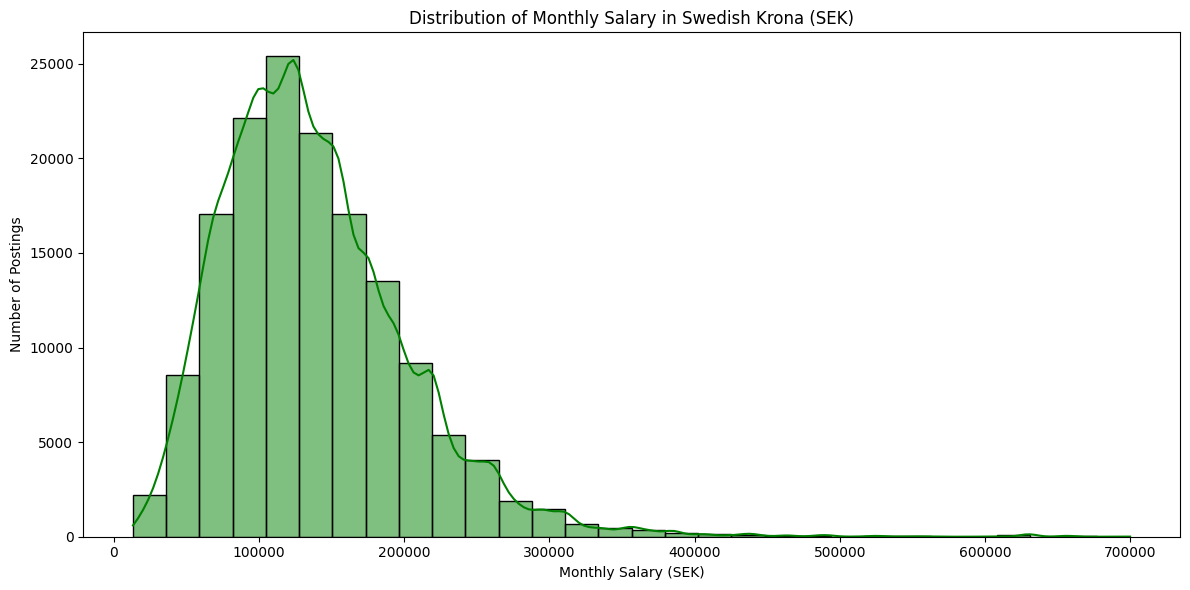

In [77]:
sek_stats = df["monthly_salary_sek"] = df["salary_in_usd"] * usd_to_sek / 12


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df["monthly_salary_sek"], bins=30, kde=True, color="green")

plt.title("Distribution of Monthly Salary in Swedish Krona (SEK)")
plt.xlabel("Monthly Salary (SEK)")
plt.ylabel("Number of Postings")
plt.tight_layout()
plt.show()

#### g)  Now create distributions of monthly SEK based on different experience levels, do you see any trends?

In [78]:
print(df["experience_level"].unique())

['EX' 'SE' 'MI' 'EN']


<Figure size 1200x600 with 0 Axes>

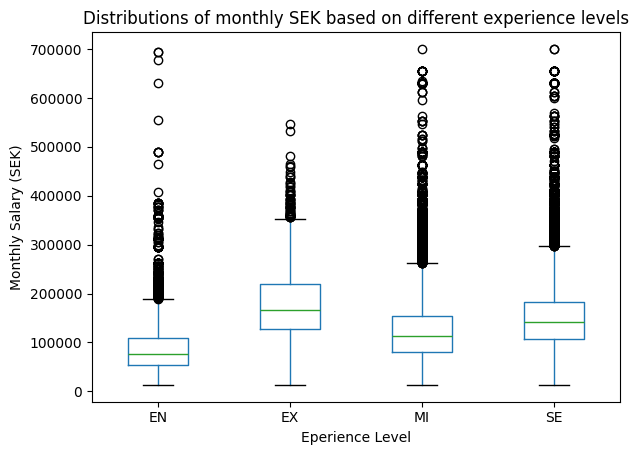

In [79]:
plt.figure(figsize=(12, 6 ))
df.boxplot(column="monthly_salary_sek", by="experience_level", grid=False)
plt.title("Distributions of monthly SEK based on different experience levels")
plt.suptitle("")

plt.xlabel("Eperience Level")
plt.ylabel("Monthly Salary (SEK)")
plt.tight_layout()
plt.show()

C:\Users\edwin\AppData\Local\Temp\ipykernel_20468\3352315166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="experience_level", y="monthly_salary_sek", data=df, palette="Set2")


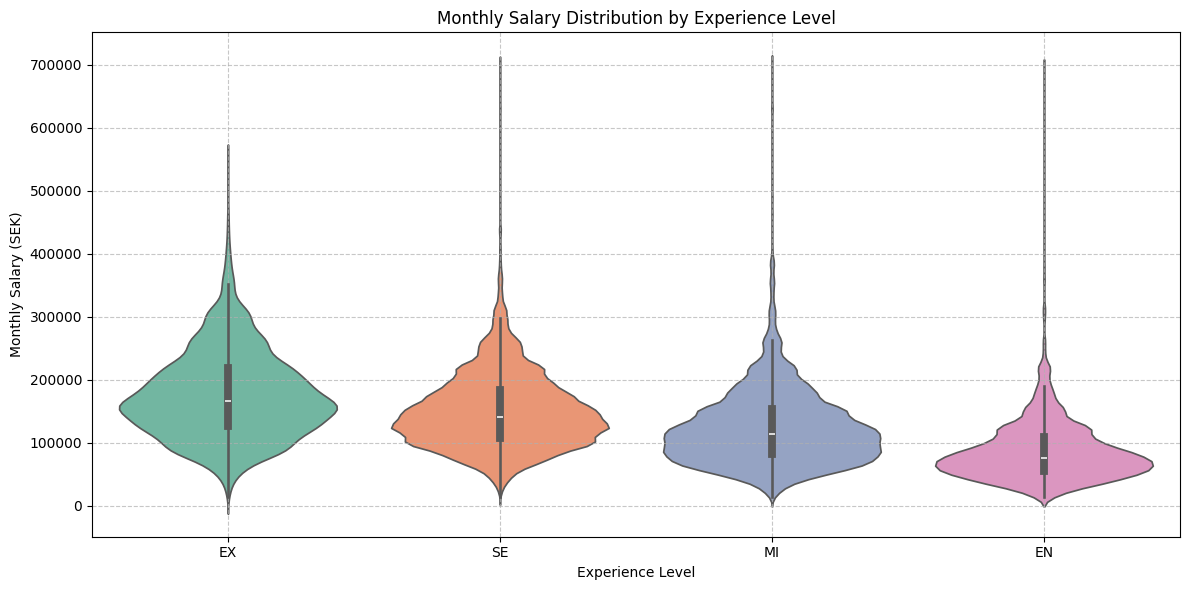

In [80]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.violinplot(x="experience_level", y="monthly_salary_sek", data=df, palette="Set2")
plt.title("Monthly Salary Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Monthly Salary (SEK)")
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

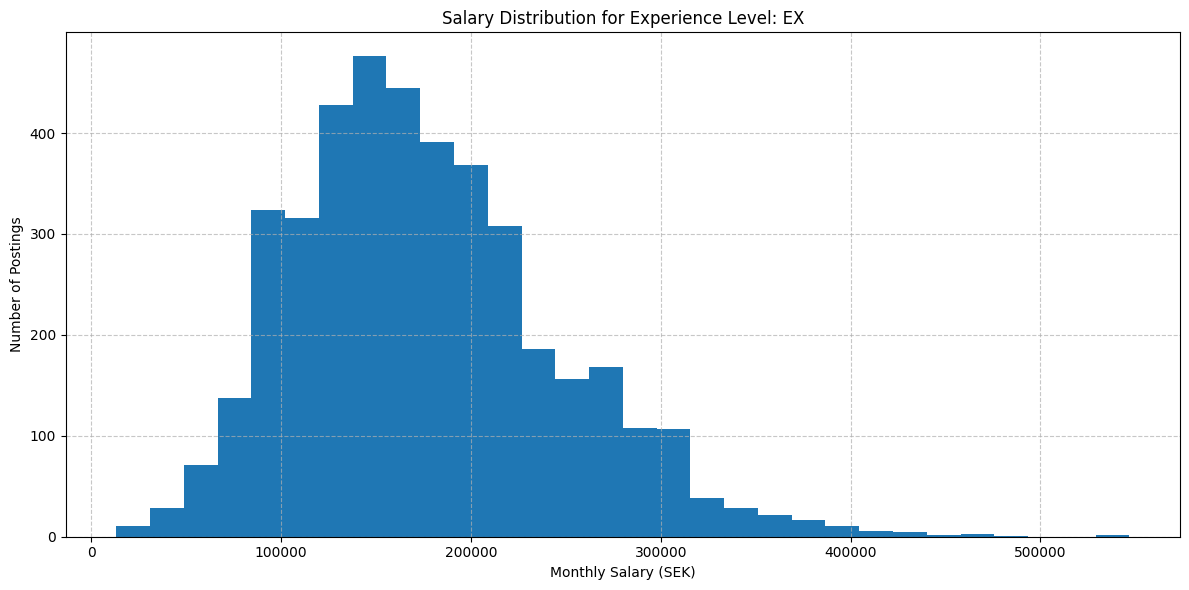

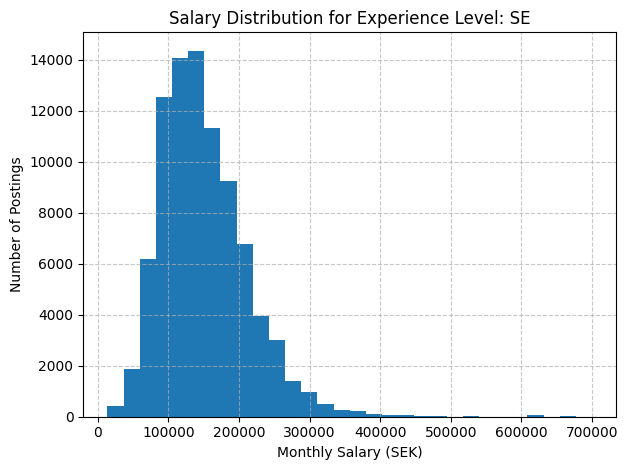

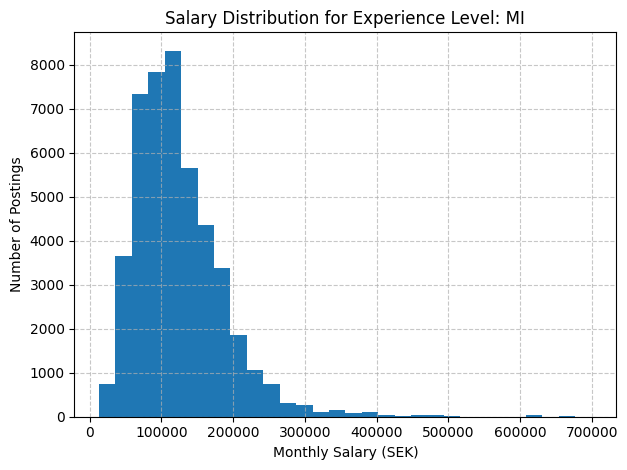

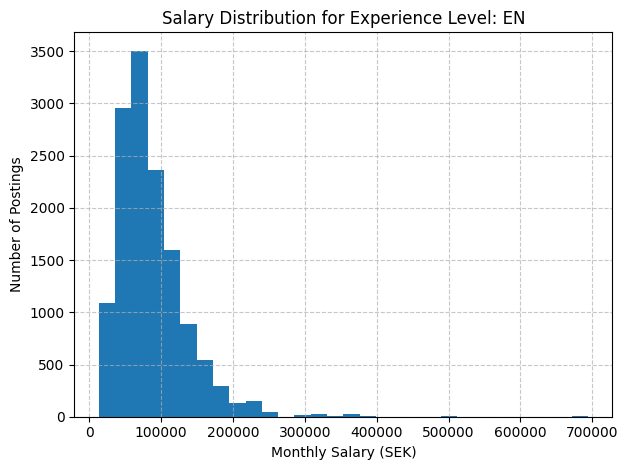

In [81]:
experience_levels = df["experience_level"].unique()
plt.figure(figsize=(12, 6))
for i, level in enumerate(experience_levels):
    plt.subplot
    subset = df[df["experience_level"] == level]
    plt.hist(subset["monthly_salary_sek"], bins= 30)
    plt.title(f"Salary Distribution for Experience Level: {level}")
    plt.xlabel("Monthly Salary (SEK)")
    plt.ylabel("Number of Postings")
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

#### h) Find median monthly swedish salary for more common job_titles. Think what common may mean here.

In [82]:
common_titles = df["job_title"].value_counts().head(15).index
common_jobs_df = df[df["job_title"].isin(common_titles)]
median_salaries = (
    common_jobs_df.groupby("job_title")["monthly_salary_sek"]
    .median()
    .sort_values(ascending=False)
)
print(median_salaries)

job_title
Machine Learning Engineer    165375.00
Software Engineer            157500.00
Research Scientist           157500.00
Product Manager              153125.00
AI Engineer                  144375.00
Applied Scientist            142625.00
Engineer                     139125.00
Manager                      136062.50
Data Architect               132956.25
Data Scientist               131250.00
Analytics Engineer           127750.00
Data Engineer                122500.00
Associate                    108850.00
Analyst                       91875.00
Data Analyst                  86625.00
Name: monthly_salary_sek, dtype: float64


In [83]:


filtered_df = df[(df["monthly_salary_sek"] >= 30000) & (df["monthly_salary_sek"] <= 200000)]

common_titles = filtered_df["job_title"].value_counts().head(10).index
common_jobs_df = filtered_df[filtered_df["job_title"].isin(common_titles)]
median_salaries = (
    common_jobs_df.groupby("job_title")["monthly_salary_sek"]
    .median()
    .sort_values(ascending=False)
)

C:\Users\edwin\AppData\Local\Temp\ipykernel_20468\3585603473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_salaries.values, y=median_salaries.index, palette="viridis")


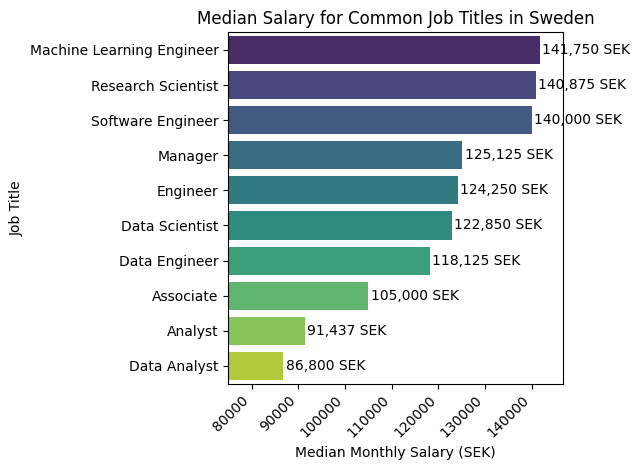

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=median_salaries.values, y=median_salaries.index, palette="viridis")
plt.xlabel("Median Monthly Salary (SEK)")
plt.ylabel("Job Title")
plt.title("Median Salary for Common Job Titles in Sweden")
plt.xticks(rotation=45, ha='right')
plt.xlim(75000, median_salaries.values.max() + 5000)
for i, value in enumerate(median_salaries.values):
    plt.text(value + 500, i, f"{int(value):,} SEK", va='center')

plt.tight_layout()
plt.show()

#### i) Join the country_codes.csv to the dataset get the actual country names. Find the median monthly salary in SEK for each country and the number of job postings.

In [85]:
country_codes = pd.read_csv("../../data/country_codes.csv")
country_codes.head()

,code,country
0,AD,Andorra
1,AE,United Arab Emirates
2,AM,Armenia
3,AR,Argentina
4,AS,American Samoa


In [86]:
print(country_codes.columns)

Index(['code', 'country'], dtype='object')


In [87]:
df = df.merge(country_codes, left_on="company_location", right_on="code", how="left")

country_stats = (
    df.groupby("country")["monthly_salary_sek"]
    .agg(median_salary_sek="median", job_postings="count")
    .sort_values(by="median_salary_sek", ascending=False)
)
country_stats.head(20)

,median_salary_sek,job_postings
country,,
Qatar,262500.0000,1
United States,132300.0000,135569
Saudi Arabia,131250.0000,3
Hong Kong,119762.1250,5
Lebanon,107187.5000,12
Canada,105000.0000,6208
New Zealand,103600.8750,80
Australia,102692.6250,595
Puerto Rico,102375.0000,12


In [88]:
filtered_stats  = country_stats[country_stats["job_postings"] >= 100]
filtered_stats.head(20)

,median_salary_sek,job_postings
country,,
United States,132300.0000,135569
Canada,105000.0000,6208
Australia,102692.6250,595
Ireland,87500.0000,149
Germany,76797.8750,455
United Kingdom,66150.0000,4181
Poland,64496.2500,166
Netherlands,63000.0000,482
Brazil,52500.0000,112


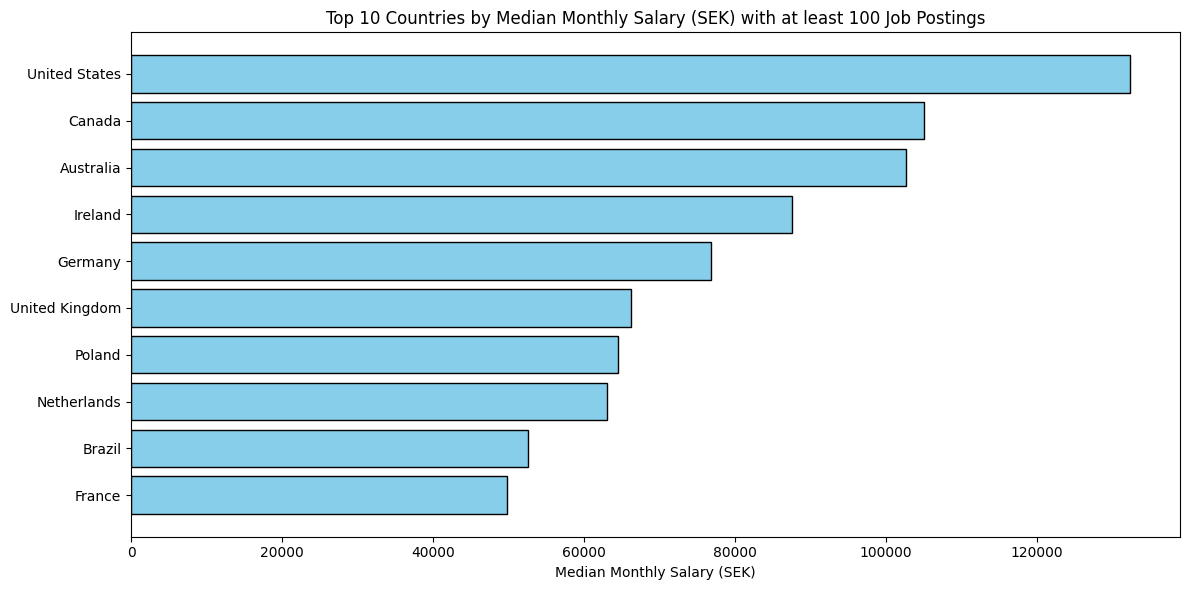

In [89]:
top10 = filtered_stats.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top10.index[::-1], top10["median_salary_sek"][::-1], color="skyblue", edgecolor="black")
plt.xlabel("Median Monthly Salary (SEK)")
plt.title("Top 10 Countries by Median Monthly Salary (SEK) with at least 100 Job Postings")
plt.tight_layout()
plt.show()

In [90]:
sweden_stats = country_stats.loc["Sweden"]
print(sweden_stats)

median_salary_sek    75577.25
job_postings            13.00
Name: Sweden, dtype: float64
